# CUSTOMER CHURN ANALYSIS USING MACHINE LEARNING 

Churn =
1(yes) if customer cancelled service, 0(No) if not

AccountWeeks =
number of weeks customer has had active account

ContractRenewal =
1(yes) if customer recently renewed contract, 0(no) if not

DataPlan =
1(yes) if customer has data plan, 0(no) if not

DataUsage =
gigabytes of monthly data usage

CustServCalls =
number of calls into customer service

DayMins =
average daytime minutes per month

DayCalls =
average number of daytime calls

MonthlyCharge =
average monthly bill

OverageFee =
largest overage fee in last 12 months

# Data Exploration

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Data set/telecom_churn.csv")
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,No,128,Yes,Yes,2.70,1,265.1,110,89.0,9.87,10.0
1,No,107,Yes,Yes,3.70,1,161.6,123,82.0,9.78,13.7
2,No,137,Yes,No,0.00,0,243.4,114,52.0,6.06,12.2
3,No,84,No,No,0.00,2,299.4,71,57.0,3.10,6.6
4,No,75,No,No,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,No,192,Yes,Yes,2.67,2,156.2,77,71.7,10.78,9.9
3329,No,68,Yes,No,0.34,3,231.1,57,56.4,7.67,9.6
3330,No,28,Yes,No,0.00,2,180.8,109,56.0,14.44,14.1
3331,No,184,No,No,0.00,2,213.8,105,50.0,7.98,5.0


In [3]:
data.dtypes

Churn               object
AccountWeeks         int64
ContractRenewal     object
DataPlan            object
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [4]:
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   object 
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   object 
 3   DataPlan         3333 non-null   object 
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 286.6+ KB


In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [7]:
data.skew()

C:\Users\DELL\AppData\Local\Temp/ipykernel_20196/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


AccountWeeks     0.096606
DataUsage        1.272057
CustServCalls    1.091359
DayMins         -0.029077
DayCalls        -0.111787
MonthlyCharge    0.594498
OverageFee      -0.023845
RoamMins        -0.245136
dtype: float64

##### Conclusion:- AccountWeeks, DataUsage, CustServCalls, MonthlyCharge this variable are positively skewed. 

In [8]:
 data.corr()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
AccountWeeks,1.000000,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
DataUsage,0.014391,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,-0.003796,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.006216,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.038470,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.012581,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,-0.006749,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023
RoamMins,0.009514,0.162746,-0.009640,-0.010155,0.021565,0.117433,-0.011023,1.000000


#### Conclusion :- There is considerable positive correlation between DataUsage with DataPlan and MonthlyCharge

# Graphical Representation

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

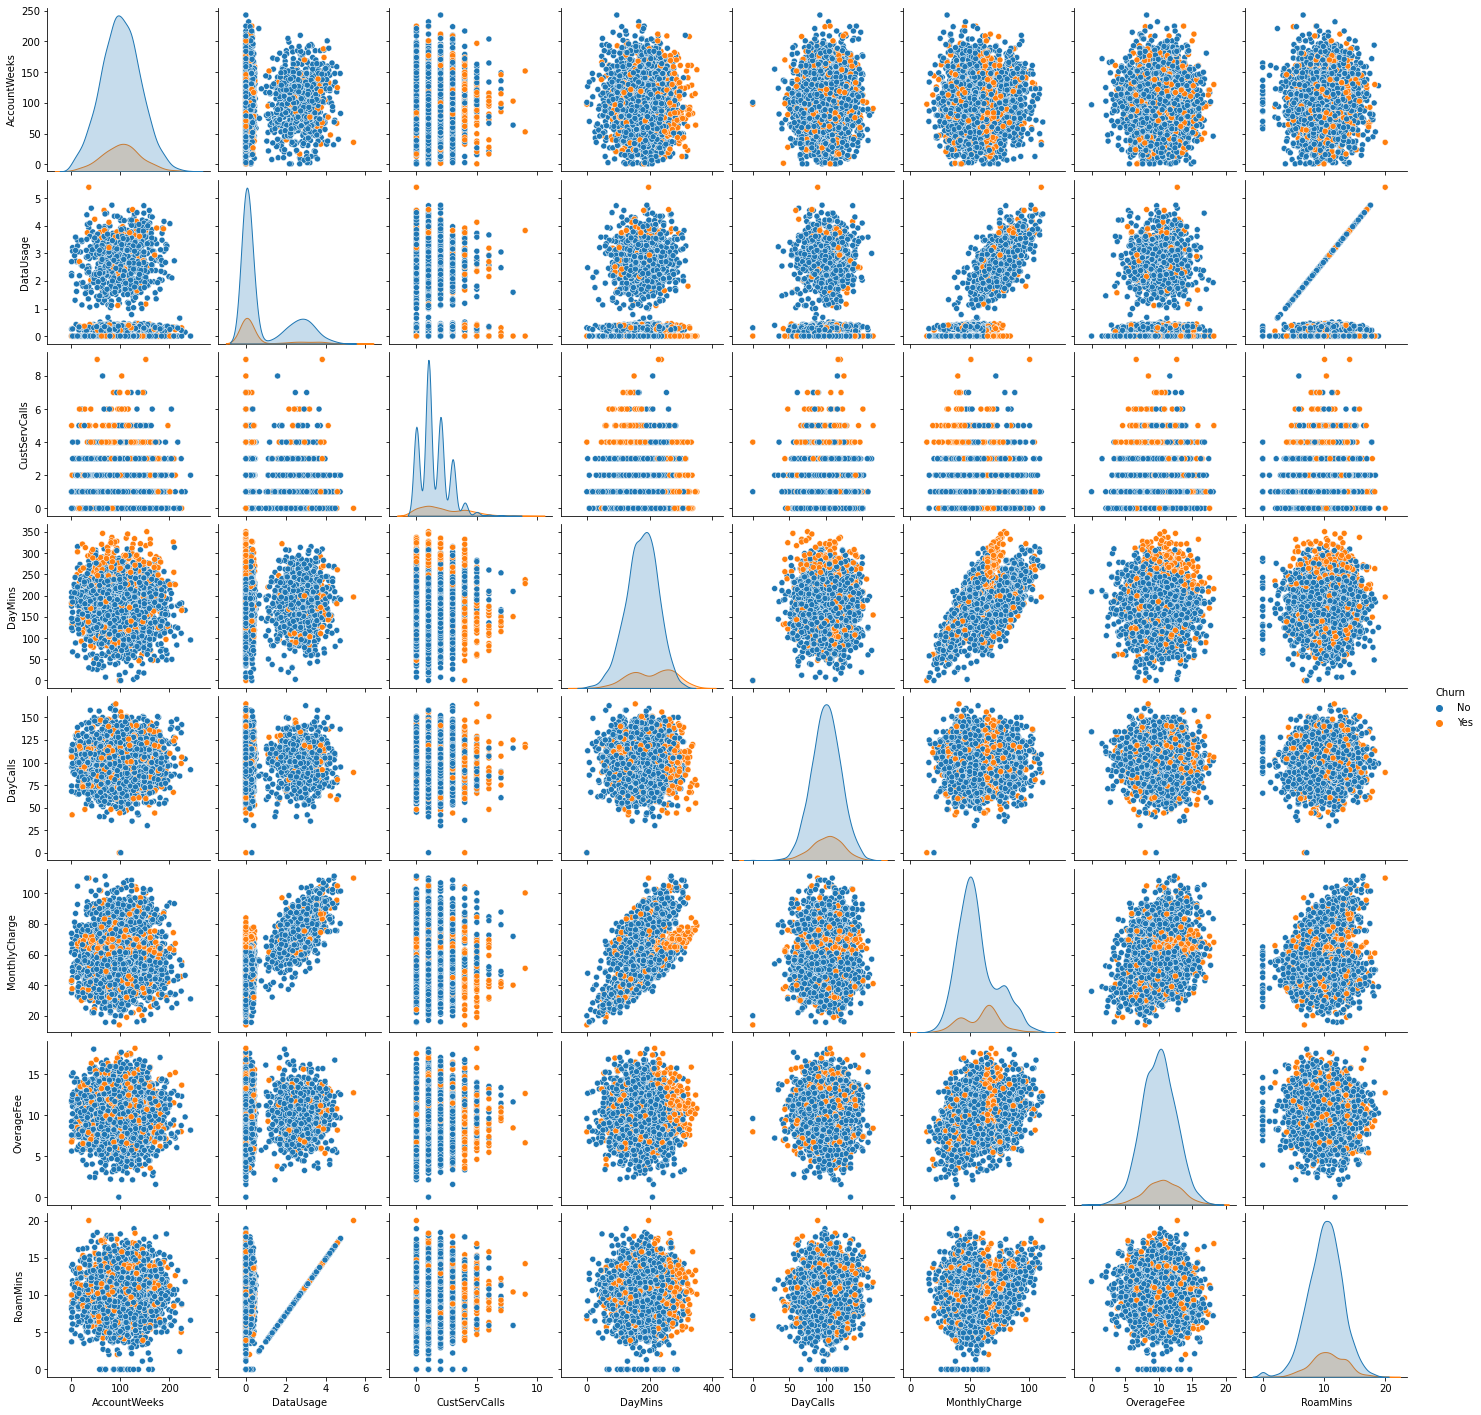

In [10]:
sn.pairplot(data=data,hue = "Churn")

<AxesSubplot:xlabel='DataUsage', ylabel='DayCalls'>

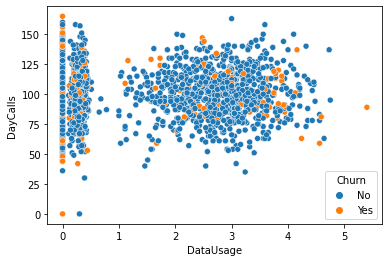

In [11]:
sn.scatterplot(data=data,x ="DataUsage",y ="DayCalls",hue ="Churn" )

array([[<AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

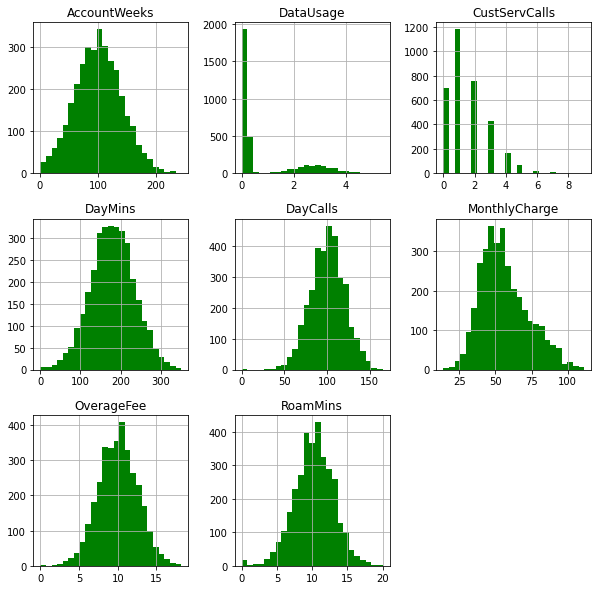

In [13]:
data.hist(figsize=(10,10),bins=25,color="g")

####  Conclusion :- From above graph , most of the varibles are normally distributed.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

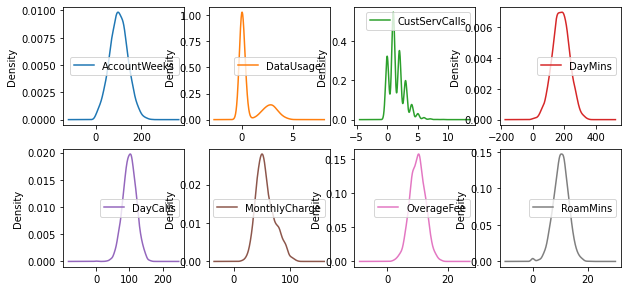

In [14]:
data.plot(kind="density", subplots=True, layout=(4,4), sharex=False,figsize = (10,10))

#### Conclusion :- From above graph , most of the varibles are normally distributed.

AccountWeeks         AxesSubplot(0.125,0.71587;0.168478x0.16413)
DataUsage         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
CustServCalls     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
DayMins           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
DayCalls            AxesSubplot(0.125,0.518913;0.168478x0.16413)
MonthlyCharge    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
OverageFee       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
RoamMins         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

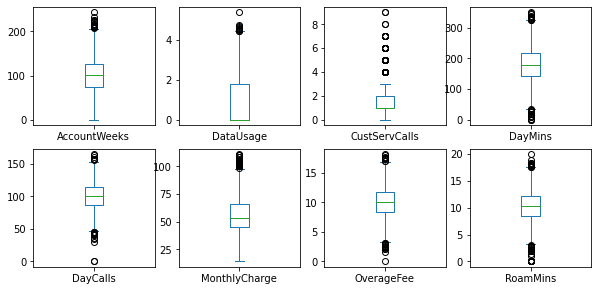

In [15]:
data.plot(kind = "box", subplots = True, layout = (4,4), sharex = False,figsize = (10,10))

#### Conclusion:- There are few outliers in each variable.

# Data Preprocessing

## Check whether the variable is normally distributed or not?

In [57]:
from scipy import stats
stats.shapiro(data)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7241822481155396, pvalue=0.0)

#### Conclusion :- Here 0.7241 is greater than p value (0.05) so we accept null hypothesis that our Data is Normally distributed.

# Model Fitting

## Logistic Regression

In [18]:
data["Churn"]=data["Churn"].astype("category")
data["Churn"]=data["Churn"].cat.codes
data["ContractRenewal"]=data["ContractRenewal"].astype("category")
data["ContractRenewal"]=data["ContractRenewal"].cat.codes
data["DataPlan"]=data["DataPlan"].astype("category")
data["DataPlan"]=data["DataPlan"].cat.codes
data.head(3)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2


In [19]:
data["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [20]:
Yes=data[data["Churn"]==0]
No=data[data["Churn"]==1]

In [21]:
display(Yes.describe())
display(No.describe())

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,2850.0,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,0.0,100.793684,0.934737,0.295439,0.862151,1.449825,175.175754,100.283158,55.816246,9.954618,10.158877
std,0.0,39.882350,0.247033,0.456320,1.286095,1.163883,50.181655,19.801157,16.439011,2.514629,2.784489
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.700000,0.000000,0.000000
25%,0.0,73.000000,1.000000,0.000000,0.000000,1.000000,142.825000,87.000000,45.000000,8.230000,8.400000
50%,0.0,100.000000,1.000000,0.000000,0.000000,1.000000,177.200000,100.000000,53.000000,9.980000,10.200000
75%,0.0,127.000000,1.000000,1.000000,2.000000,2.000000,210.300000,114.000000,64.675000,11.660000,12.000000
max,0.0,243.000000,1.000000,1.000000,4.750000,8.000000,315.600000,163.000000,111.300000,18.090000,18.900000


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,483.0,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000
mean,1.0,102.664596,0.716356,0.165631,0.546957,2.229814,206.914079,101.335404,59.190062,10.623085,10.70000
std,0.0,39.467820,0.451233,0.372135,1.155352,1.853275,68.997792,21.582307,16.065479,2.586433,2.79319
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3.550000,2.00000
25%,1.0,76.000000,0.000000,0.000000,0.000000,1.000000,153.250000,87.500000,45.000000,8.860000,8.80000
50%,1.0,103.000000,1.000000,0.000000,0.000000,2.000000,217.600000,103.000000,63.000000,10.570000,10.60000
75%,1.0,127.000000,1.000000,0.000000,0.295000,4.000000,265.950000,116.500000,69.000000,12.475000,12.80000
max,1.0,225.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,110.000000,18.190000,20.00000


In [22]:
X=data.drop("Churn",axis=1)
Y= data["Churn"]
X.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [23]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int8

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,Y)

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
lr.score(X,Y)

0.8535853585358536

In [26]:
lr.coef_

array([[-0.00332002, -2.34387289, -0.22012665,  0.024266  ,  0.42760559,
         0.01291991, -0.01143323, -0.02645653,  0.07978897, -0.00242428]])

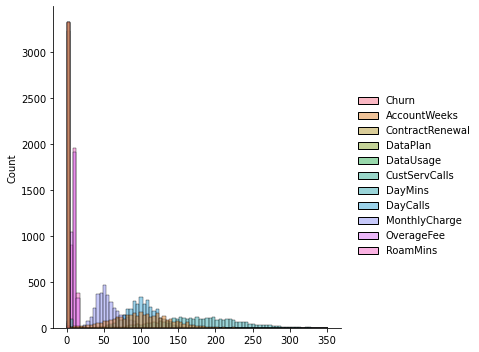

In [56]:
import seaborn as sn
sn.displot(data)

## Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier
nn=MLPClassifier(hidden_layer_sizes=20,validation_fraction=0.2,activation='logistic',
                random_state=2,solver='adam',n_iter_no_change=5,verbose=True,max_iter=500)
nn.fit(X,Y)

Iteration 1, loss = 0.70527111
Iteration 2, loss = 0.55581237
Iteration 3, loss = 0.48821355
Iteration 4, loss = 0.45666794
Iteration 5, loss = 0.43079486
Iteration 6, loss = 0.42267587
Iteration 7, loss = 0.41856418
Iteration 8, loss = 0.41494789
Iteration 9, loss = 0.40817013
Iteration 10, loss = 0.40336776
Iteration 11, loss = 0.40170727
Iteration 12, loss = 0.39986887
Iteration 13, loss = 0.39850974
Iteration 14, loss = 0.39778962
Iteration 15, loss = 0.39779527
Iteration 16, loss = 0.39719792
Iteration 17, loss = 0.39635654
Iteration 18, loss = 0.39569822
Iteration 19, loss = 0.39524885
Iteration 20, loss = 0.39507073
Iteration 21, loss = 0.39432020
Iteration 22, loss = 0.39415353
Iteration 23, loss = 0.39374609
Iteration 24, loss = 0.39230747
Iteration 25, loss = 0.39316034
Iteration 26, loss = 0.39210812
Iteration 27, loss = 0.39134144
Iteration 28, loss = 0.39050500
Iteration 29, loss = 0.38994295
Iteration 30, loss = 0.38908897
Iteration 31, loss = 0.38868609
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=20, max_iter=500,
              n_iter_no_change=5, random_state=2, validation_fraction=0.2,
              verbose=True)

In [29]:
nn.score(X,Y)

0.8757875787578758

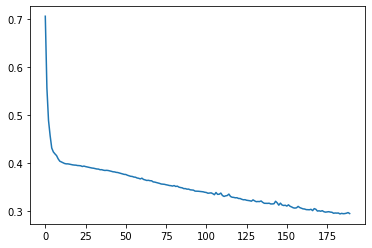

In [30]:
import matplotlib.pyplot as plt
plt.plot(nn.loss_curve_)

# Random Forest Classification

In [34]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.25,stratify=Y,random_state=0)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       713
           1       0.92      0.72      0.81       121

    accuracy                           0.95       834
   macro avg       0.93      0.85      0.89       834
weighted avg       0.95      0.95      0.95       834



C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


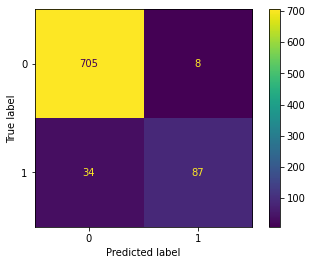

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
clfrf = RandomForestClassifier(n_estimators=100, random_state=0)
clfrf.fit(Xtrain, Ytrain)
pr = clfrf.predict(Xtest)
print(classification_report(Ytest, pr))
plot_confusion_matrix(clfrf, Xtest, Ytest)  

# KNN Model

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       933
           1       0.70      0.29      0.41       178

    accuracy                           0.87      1111
   macro avg       0.79      0.63      0.67      1111
weighted avg       0.85      0.87      0.84      1111



C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


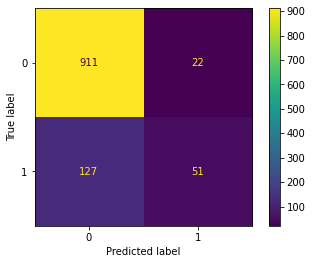

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(Xtrain, Ytrain)
pk = clfk.predict(Xtest)
print(classification_report(Ytest, pk))
plot_confusion_matrix(clfk, Xtest, Ytest) 

# Data Validation

In [40]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.25,stratify=Y,random_state=0)
lr1 = LogisticRegression(max_iter=600,random_state=0)
lr1.fit(Xtrain,Ytrain)
lr1.score(Xtest,Ytest)

0.8633093525179856

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


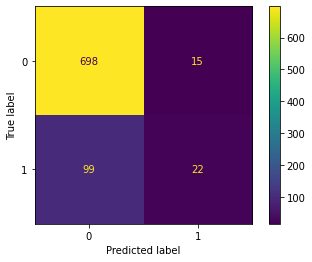

In [41]:
from sklearn import metrics
Ypred=lr1.predict(Xtest)
tn,fp,fn,tp=metrics.confusion_matrix(Ytest,Ypred).ravel()
metrics.plot_confusion_matrix(lr1,Xtest,Ytest)

In [42]:
print(metrics.classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       713
           1       0.59      0.18      0.28       121

    accuracy                           0.86       834
   macro avg       0.74      0.58      0.60       834
weighted avg       0.83      0.86      0.83       834



#### Conclusion :- In logistic regression model, from confusion matrix we can say that 114 obs are falsely predicted (in practical there are 15 customers who didn't canceled the service but by the model they cancle service and there are 99 customers who canceled the service but by the model they don't cancle the service. But the error is minimum.

## Data Validation of neural network model

In [43]:
nn1=MLPClassifier(hidden_layer_sizes=20,validation_fraction=0.2,activation='logistic',
                random_state=2,solver='adam',n_iter_no_change=5,verbose=True,max_iter=500)
nn1.fit(Xtrain,Ytrain)

Iteration 1, loss = 0.72569810
Iteration 2, loss = 0.60200121
Iteration 3, loss = 0.51872055
Iteration 4, loss = 0.48199237
Iteration 5, loss = 0.45833371
Iteration 6, loss = 0.43542713
Iteration 7, loss = 0.42545971
Iteration 8, loss = 0.42114778
Iteration 9, loss = 0.41801052
Iteration 10, loss = 0.41561721
Iteration 11, loss = 0.41319020
Iteration 12, loss = 0.40955977
Iteration 13, loss = 0.40384239
Iteration 14, loss = 0.40275065
Iteration 15, loss = 0.40126223
Iteration 16, loss = 0.39998485
Iteration 17, loss = 0.39887791
Iteration 18, loss = 0.39723429
Iteration 19, loss = 0.39770438
Iteration 20, loss = 0.39703454
Iteration 21, loss = 0.39575485
Iteration 22, loss = 0.39580918
Iteration 23, loss = 0.39539905
Iteration 24, loss = 0.39544897
Iteration 25, loss = 0.39477408
Iteration 26, loss = 0.39485200
Iteration 27, loss = 0.39529780
Iteration 28, loss = 0.39420823
Iteration 29, loss = 0.39349236
Iteration 30, loss = 0.39373619
Iteration 31, loss = 0.39275480
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=20, max_iter=500,
              n_iter_no_change=5, random_state=2, validation_fraction=0.2,
              verbose=True)

In [44]:
nn1.score(Xtest,Ytest)

0.882494004796163

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


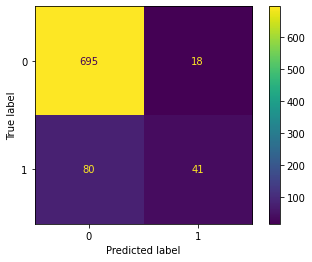

In [45]:
Ypred=nn1.predict(Xtest)
tn,fp,fn,tp=metrics.confusion_matrix(Ytest,Ypred).ravel()
metrics.plot_confusion_matrix(nn1,Xtest,Ytest)

In [46]:
print(metrics.classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       713
           1       0.69      0.34      0.46       121

    accuracy                           0.88       834
   macro avg       0.80      0.66      0.69       834
weighted avg       0.87      0.88      0.86       834



#### Conclusion:-  In neural network model, from confusion matrix we can say that 98 obs are falsely predicted (in practical there are 18 customers who didn't canceled the service but by the model they cancle service and there are 80 customers who canceled the service but by the model they don't cancle the service. But the error is minimum.

# Cross validation

## K - fold for logistic regression

In [53]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
acc=[]
lr=LogisticRegression(random_state=0,max_iter=500)
for i,j in kf.split(X.values):
    Xtrain,Xtest=X.values[i],X.values[j]
    Ytrain,Ytest=Y[i],Y[j]
    lr.fit(Xtrain,Ytrain)
    acc.append(lr.score(Xtest,Ytest)) 

In [54]:
acc

[0.8811881188118812, 0.8568856885688569, 0.8433843384338434]

In [48]:
import numpy as np
np.mean(acc)

0.8604860486048606

#### Conclusion :- Logistic regression model is good fitted.